<a href="https://colab.research.google.com/github/6hAkunAmAtAtA9/Neural_pathway/blob/main/2_Number_sequences.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [234]:
import numpy as np
import matplotlib.pyplot as plt 

В этой задаче я буду тренировать нейросети определять закономерности в числа. Нейросети на вход подается три числа; цель - определить три закономерности в числах (рост, уменьшение, равенство двух чисел) либо отсутствие закономерностей.

In [235]:
# Создаю функцию функцию для генерации данных
np.random.seed(42)
def case_generation(list_size=100):
  x_train = np.around(np.random.random(size=(list_size, 3)), decimals=1)
  y_train, y_labels = [], []

  for elem in x_train:
    if elem[0] < elem[1] < elem[2]: # GROW
      y_train.append([1, 0, 0, 0])
      y_labels.append('GROW')
    elif elem[0] > elem[1] > elem[2]: # REDUCE
      y_train.append([0, 1, 0, 0])
      y_labels.append('REDUCE')
    elif elem[0] == elem[1] or elem[1] == elem[2] or elem[0] == elem[2]: # EQUAL
      y_train.append([0, 0, 1, 0])
      y_labels.append('EQUAL')
    else:
      y_train.append([0, 0, 0, 1])
      y_labels.append('NOTHING')
  y_train = np.array(y_train); y_labels = np.array(y_labels)
  return x_train, y_train, y_labels

In [236]:
# Геерация тренировочных и тестовых выборок
x_train, y_train, y_labels = case_generation(500)
x_test, y_test, y__test_labels = case_generation(50)

In [237]:
# Создание матриц весов
np.random.seed(42)
hidden_size = 10
weights_i_h = np.random.random(size=(hidden_size, len(x_train[0]))) - 0.5
weights_h_o = np.random.random(size=(len(y_test[0]), hidden_size)) - 0.5

In [238]:
# Обучение нейросети с одним скрытым слоем из 10 нейронов без функций активации
alpha = 0.0001
iterations = 1000
total_err = []

for iteration in range(iterations):
  error = 0
  for id in range(len(x_train)):
    input = np.reshape(x_train[id], (len(x_train[id]), 1))
    layer_1 = np.dot(weights_i_h, input) 
    output = np.dot(weights_h_o, layer_1) 
    error += np.sum((np.reshape(y_train[id], (len(y_train[id]), 1)) - output) ** 2)
    delta_out = np.reshape(y_train[id], (len(y_train[id]), 1)) - output
    delta_h = np.dot(weights_h_o.T, delta_out) * layer_1
    weights_h_o += alpha * np.dot(delta_out, layer_1.T)
    weights_i_h += alpha * np.dot(delta_h, input.T)

  total_err.append(error / len(x_train))
  if iteration in (0, iterations - 1):
    print(f'ITER: {iteration}, ERR: {error / len(x_train)}')

ITER: 0, ERR: 1.1730159252508774
ITER: 999, ERR: 0.6388526819854337


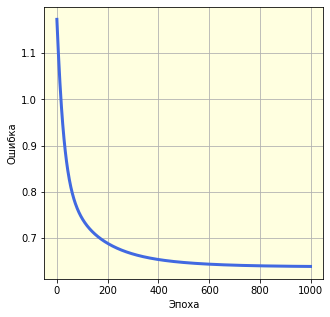

In [239]:
plt.figure(figsize=(5, 5))  
ax = plt.axes()
ax.set(facecolor = "LightYellow")

plt.plot(list(range(len(total_err))), total_err, color='RoyalBlue', linewidth=3,
          markeredgewidth=2, markersize=10, markevery=5)                               
                                    
plt.xlabel('Эпоха')                    
plt.ylabel('Ошибка')  
plt.grid()                       

In [240]:
error = 0
for id in range(len(x_test)):
  input = np.reshape(x_test[id], (len(x_test[id]), 1))
  layer_1 = np.dot(weights_i_h, input) 
  output = np.dot(weights_h_o, layer_1)
  error += np.sum((np.reshape(y_test[id], (len(y_test[id]), 1)) - output) ** 2)
  # print(f'OUT: {np.around(output.T, decimals=2)}, ERR: {np.around(error, decimals=2)}, GOAL: {y_test[id]}')
try:
  print(f'На тестовых данных средняя ошибка данной нейросети равна: {round(error / len(x_test) * 100)} процент(ам/ту).')
except:
  print('Ошибку считать нет смысла')

На тестовых данных средняя ошибка данной нейросети равна: 67 процент(ам/ту).


Здесь я проведу тренировку нейросети с такими же весами, но уже с функцией активации скрытого слоя relu.

In [241]:
# Функции relu и ее производная
def relu(x):
  return (x > 0) * x
def relu_deriv(output):
  return output > 0

In [242]:
np.random.seed(42)
hidden_size = 10
weights_i_h = np.random.random(size=(hidden_size, len(x_train[0]))) - 0.5
weights_h_o = np.random.random(size=(len(y_test[0]), hidden_size)) - 0.5

In [243]:
alpha = 0.001
iterations = 1000
total_err = []

for iteration in range(iterations):
  error = 0
  for id in range(len(x_train)):
    input = np.reshape(x_train[id], (len(x_train[id]), 1))
    layer_1 = relu(np.dot(weights_i_h, input)) 
    output = np.dot(weights_h_o, layer_1) 
    error += np.sum((np.reshape(y_train[id], (len(y_train[id]), 1)) - output) ** 2)
    delta_out = np.reshape(y_train[id], (len(y_train[id]), 1)) - output
    delta_h = np.dot(weights_h_o.T, delta_out) * relu_deriv(layer_1)
    weights_h_o += alpha * np.dot(delta_out, layer_1.T)
    weights_i_h += alpha * np.dot(delta_h, input.T)

  total_err.append(error / len(x_train))
  if iteration in (0, iterations - 1):
    print(f'ITER: {iteration}, ERR: {error / len(x_train)}')

ITER: 0, ERR: 1.0280297576453508
ITER: 999, ERR: 0.43132225683243025


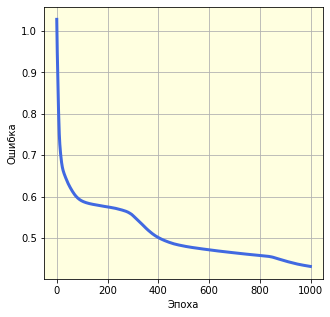

In [244]:
plt.figure(figsize=(5, 5))  
ax = plt.axes()
ax.set(facecolor = "LightYellow")
plt.plot(list(range(len(total_err))), total_err, color='RoyalBlue', linewidth=3,
          markeredgewidth=2, markersize=10, markevery=5)                                                                  
plt.xlabel('Эпоха')
plt.ylabel('Ошибка')                 
plt.grid()                    

In [245]:
error = 0
for id in range(len(x_test)):
  input = np.reshape(x_test[id], (len(x_test[id]), 1))
  layer_1 = relu(np.dot(weights_i_h, input))
  output = np.dot(weights_h_o, layer_1)
  error += np.sum((np.reshape(y_test[id], (len(y_test[id]), 1)) - output) ** 2)
print(f'На тестовых данных средняя ошибка данной нейросети равна: {round(error / len(x_test) * 100)} процент(ам/ту).')

На тестовых данных средняя ошибка данной нейросети равна: 44 процент(ам/ту).


То же самое только с RELU и SOFTMAX.

In [246]:
def softmax(x):
  temp = np.exp(x)
  return temp / np.sum(temp, axis=1, keepdims=True)

In [247]:
np.random.seed(42)
hidden_size = 10
weights_i_h = np.random.random(size=(hidden_size, len(x_train[0]))) - 0.5
weights_h_o = np.random.random(size=(len(y_test[0]), hidden_size)) - 0.5

In [248]:
alpha = 0.001
iterations = 1000
total_err = []

for iteration in range(iterations):
  error = 0
  for id in range(len(x_train)):
    input = np.reshape(x_train[id], (len(x_train[id]), 1))
    layer_1 = relu(np.dot(weights_i_h, input)) #relu
    output = softmax(np.dot(weights_h_o, layer_1).T).T # softmax
    error += np.sum((np.reshape(y_train[id], (len(y_train[id]), 1)) - output) ** 2)
    delta_out = np.reshape(y_train[id], (len(y_train[id]), 1)) - output
    delta_h = np.dot(weights_h_o.T, delta_out) * relu_deriv(layer_1)
    weights_h_o += alpha * np.dot(delta_out, layer_1.T)
    weights_i_h += alpha * np.dot(delta_h, input.T)

  total_err.append(error / len(x_train))
  if iteration in (0, iterations - 1):
    print(f'ITER: {iteration}, ERR: {error / len(x_train)}')

ITER: 0, ERR: 0.761749739188232
ITER: 999, ERR: 0.35281417638766954


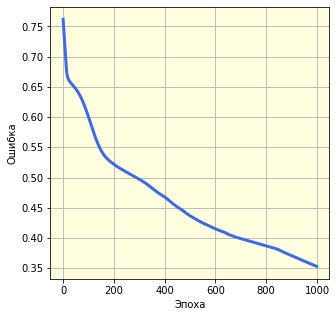

In [249]:
plt.figure(figsize=(5, 5))  
ax = plt.axes()
ax.set(facecolor = "LightYellow")
plt.plot(list(range(len(total_err))), total_err, color='RoyalBlue', linewidth=3,
          markeredgewidth=2, markersize=10, markevery=5)                                                
plt.xlabel('Эпоха')                
plt.ylabel('Ошибка')  
plt.grid()                    

In [250]:
error = 0
for id in range(len(x_test)):
  input = np.reshape(x_test[id], (len(x_test[id]), 1))
  layer_1 = relu(np.dot(weights_i_h, input)) 
  output = softmax(np.dot(weights_h_o, layer_1).T).T 
  error += np.sum((np.reshape(y_test[id], (len(y_test[id]), 1)) - output) ** 2)
print(f'На тестовых данных средняя ошибка данной нейросети равна: {round(error / len(x_test) * 100)} процент(ам/ту).')

На тестовых данных средняя ошибка данной нейросети равна: 34 процент(ам/ту).


Теперь, для нахождения наиболее оптимального количества нейронов в скрытом слое, я буду прогонять нейросети с различными размерами скрытых слоев. Для этого я сделаю функцию генерации весов для нейросети на которую буду подавать количества нейронов в слое.

In [251]:
def get_weights(hidden_size=10):
  np.random.seed(40)
  weights_i_h = np.random.random(size=(hidden_size, len(x_train[0]))) - 0.5
  weights_h_o = np.random.random(size=(len(y_test[0]), hidden_size)) - 0.5
  return weights_i_h, weights_h_o

In [252]:
total_err_hs_dict = {}
for hidden_size in range (1, 26, 3): # Перебор размера скрытого слоя от 1 до 26 с шагом 3
  weights_i_h, weights_h_o = get_weights(hidden_size)
  alpha = 0.025
  iterations = 500
  total_err = []

  for iteration in range(iterations):
    total_err_iter = []
    error = 0
    for id in range(len(x_train)):
      input = np.reshape(x_train[id], (len(x_train[id]), 1))
      layer_1 = relu(np.dot(weights_i_h, input))
      output = softmax(np.dot(weights_h_o, layer_1).T).T 
      error = np.sum((np.reshape(y_train[id], (len(y_train[id]), 1)) - output) ** 2)
      delta_out = np.reshape(y_train[id], (len(y_train[id]), 1)) - output
      delta_h = np.dot(weights_h_o.T, delta_out) * relu_deriv(layer_1)
      weights_h_o += alpha * np.dot(delta_out, layer_1.T)
      weights_i_h += alpha * np.dot(delta_h, input.T)
      total_err_iter.append(error)

    if iteration == iterations-1:
      print(f'H_S: {hidden_size}, ITER: {iteration}, ERR: {np.array(total_err_iter).mean()}')
    total_err.append(np.array(total_err_iter).mean())
  total_err_hs_dict[hidden_size] = total_err

H_S: 1, ITER: 499, ERR: 0.6804725901840256
H_S: 4, ITER: 499, ERR: 0.3631052077544708
H_S: 7, ITER: 499, ERR: 0.18830262637564205
H_S: 10, ITER: 499, ERR: 0.1772303292134974
H_S: 13, ITER: 499, ERR: 0.003507659166376329
H_S: 16, ITER: 499, ERR: 0.0037323759136435883
H_S: 19, ITER: 499, ERR: 0.0036093869000239464
H_S: 22, ITER: 499, ERR: 0.0033676175201108787
H_S: 25, ITER: 499, ERR: 0.004449688099898402


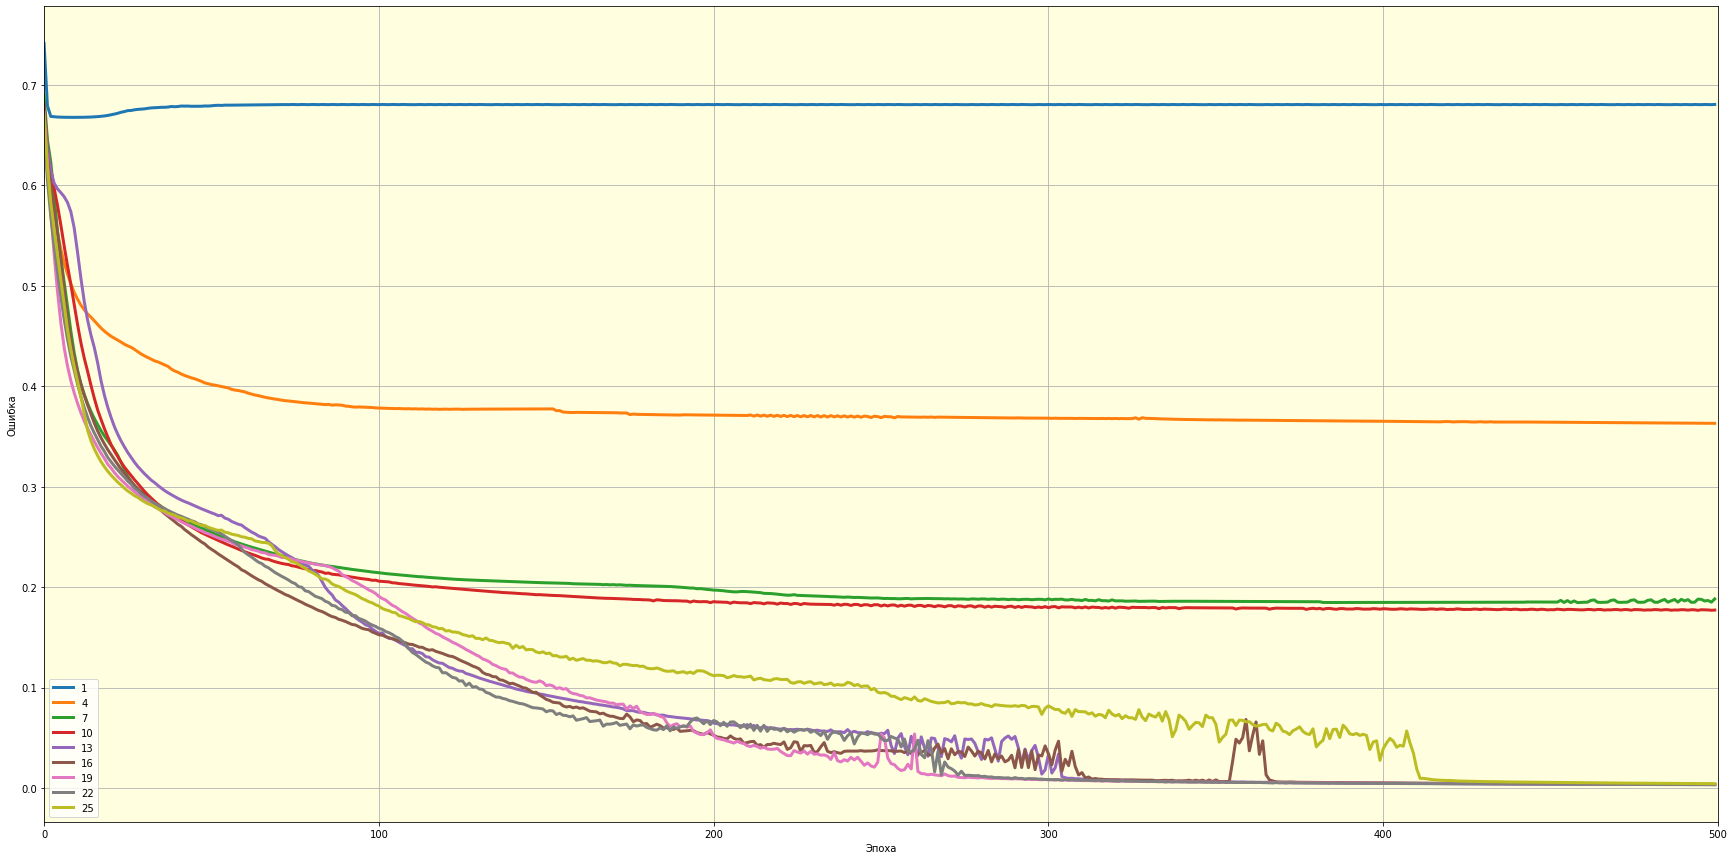

In [253]:
plt.figure(figsize=(30, 15))  
ax = plt.axes()
ax.set(facecolor = "LightYellow")
for k, v in total_err_hs_dict.items():
  plt.plot(list(range(len(v))), v, label=str(k), linewidth=3)
  plt.legend()

plt.xlabel('Эпоха')                    
plt.ylabel('Ошибка') 
plt.xlim(0, 500) 
plt.grid()   
plt.show()                 

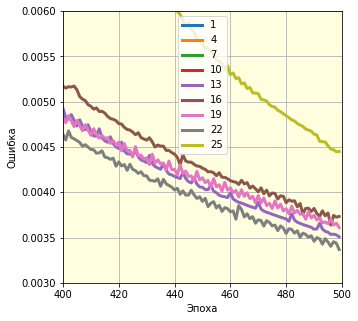

In [260]:
# А обучение то и не думало останавливаться :)
plt.figure(figsize=(5, 5))  
ax = plt.axes()
ax.set(facecolor = "LightYellow")
for k, v in total_err_hs_dict.items():
  plt.plot(list(range(len(v))), v, label=str(k), linewidth=3)
  plt.legend()

plt.xlabel('Эпоха')                    
plt.ylabel('Ошибка') 
plt.xlim(400, 500) 
plt.ylim(0.003, 0.006) 
plt.grid()   
plt.show()      

Теперь переберем различные варианты коэффициентов скорости обучения (alpha), для нахождения среди них наиболее эффективного.

In [261]:
total_err_alpha_dict = {}
for alpha in [0.5, 0.25, 0.1, 0.05, 0.025, 0.01, 0.005, 0.0025, 0.001]:
  weights_i_h, weights_h_o = get_weights(22)
  iterations = 500
  total_err = []

  for iteration in range(iterations):
    total_err_iter = []
    error = 0
    for id in range(len(x_train)):
      input = np.reshape(x_train[id], (len(x_train[id]), 1))
      layer_1 = relu(np.dot(weights_i_h, input))
      output = softmax(np.dot(weights_h_o, layer_1).T).T 
      error = np.sum((np.reshape(y_train[id], (len(y_train[id]), 1)) - output) ** 2)
      delta_out = np.reshape(y_train[id], (len(y_train[id]), 1)) - output
      delta_h = np.dot(weights_h_o.T, delta_out) * relu_deriv(layer_1)
      weights_h_o += alpha * np.dot(delta_out, layer_1.T)
      weights_i_h += alpha * np.dot(delta_h, input.T)

      total_err_iter.append(error)

    if iteration == iterations-1:
      print(f'ALPHA: {alpha}, ITER: {iteration}, ERR: {np.array(total_err_iter).mean()}')
    total_err.append(np.array(total_err_iter).mean())
  total_err_alpha_dict[alpha] = total_err

ALPHA: 0.5, ITER: 499, ERR: 0.7117184416087413
ALPHA: 0.25, ITER: 499, ERR: 0.45662797822479706
ALPHA: 0.1, ITER: 499, ERR: 0.3115765276655177
ALPHA: 0.05, ITER: 499, ERR: 0.15599999869349424
ALPHA: 0.025, ITER: 499, ERR: 0.0033676175201108787
ALPHA: 0.01, ITER: 499, ERR: 0.027124521923742945
ALPHA: 0.005, ITER: 499, ERR: 0.15251448160353134
ALPHA: 0.0025, ITER: 499, ERR: 0.24508450840037255
ALPHA: 0.001, ITER: 499, ERR: 0.3118089965157933


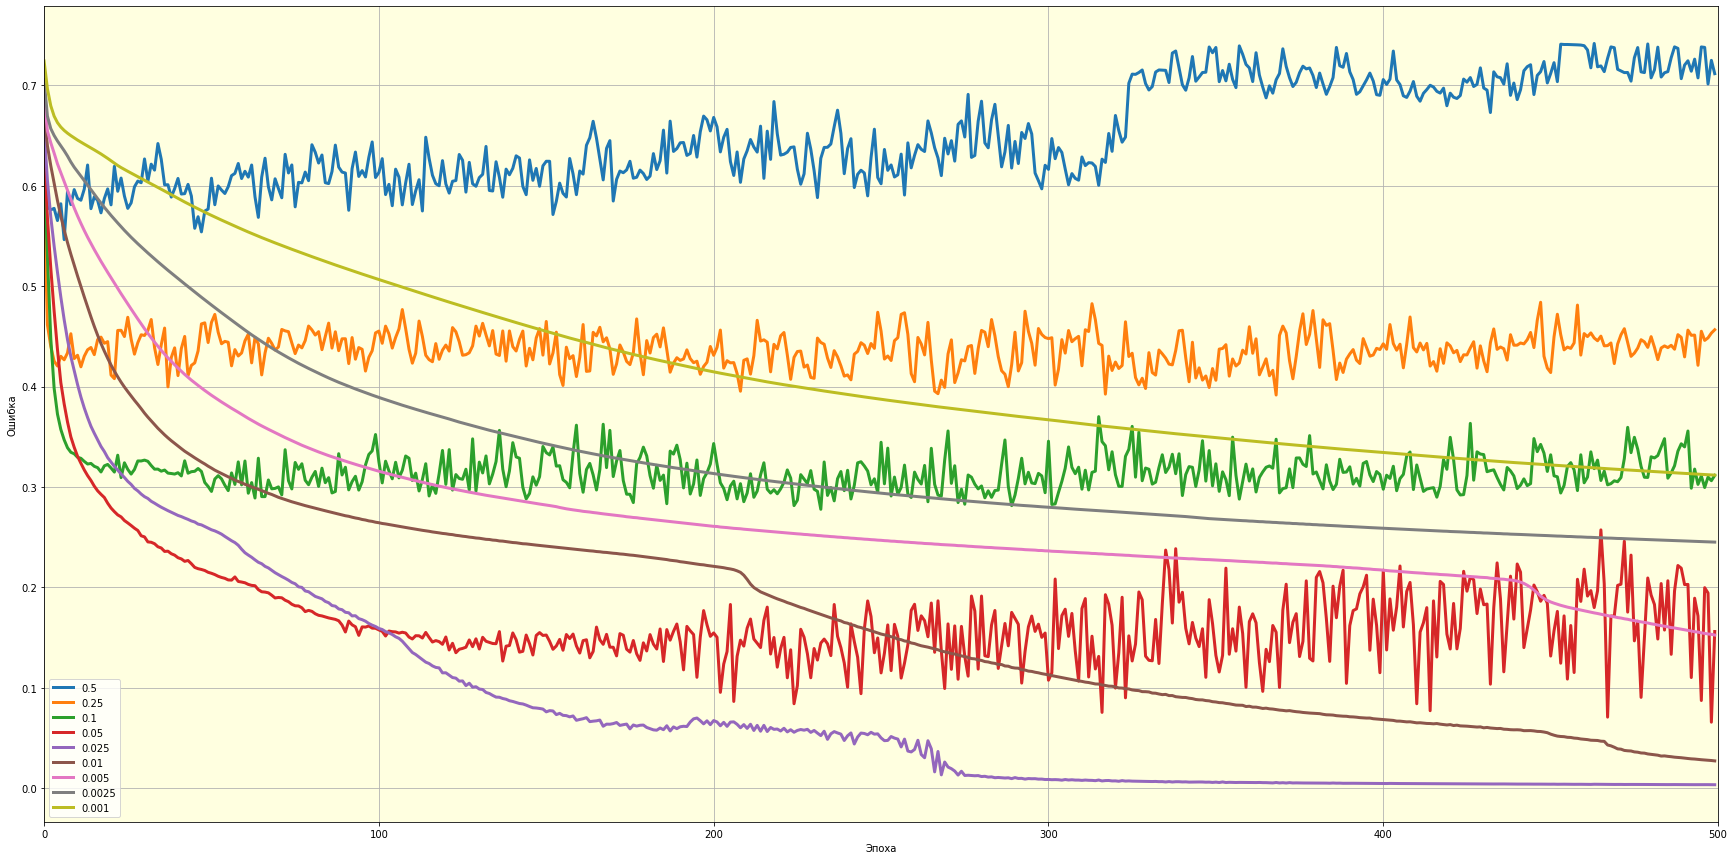

In [262]:
plt.figure(figsize=(30, 15))  
ax = plt.axes()
ax.set(facecolor = "LightYellow")
for k, v in total_err_alpha_dict.items():
  plt.plot(list(range(len(v))), v, label=str(k), linewidth=3)
  plt.legend()

plt.xlabel('Эпоха')                    
plt.ylabel('Ошибка') 
plt.xlim(0, 500) 
plt.grid()   
plt.show() 

In [263]:
# Последняя тренировка сети :(
weights_i_h, weights_h_o = get_weights(16)
iterations = 500
alpha = 0.025
for iteration in range(iterations):
  for id in range(len(x_train)):
    input = np.reshape(x_train[id], (len(x_train[id]), 1))
    layer_1 = relu(np.dot(weights_i_h, input))
    output = softmax(np.dot(weights_h_o, layer_1).T).T 
    delta_out = np.reshape(y_train[id], (len(y_train[id]), 1)) - output
    delta_h = np.dot(weights_h_o.T, delta_out) * relu_deriv(layer_1)
    weights_h_o += alpha * np.dot(delta_out, layer_1.T)
    weights_i_h += alpha * np.dot(delta_h, input.T)

In [264]:
error = 0
for id in range(len(x_test)):
  input = np.reshape(x_test[id], (len(x_test[id]), 1))
  layer_1 = relu(np.dot(weights_i_h, input)) 
  output = softmax(np.dot(weights_h_o, layer_1).T).T 
  error += np.sum((np.reshape(y_test[id], (len(y_test[id]), 1)) - output) ** 2)
print(f'На тестовых данных средняя ошибка данной нейросети равна: {round(error / len(x_test) * 100, 4)} процент(ам/ту).')

На тестовых данных средняя ошибка данной нейросети равна: 0.0952 процентa).


Лучше всего себя продемонстировала нейросеть с 16 нейронами в скрытом слое обучаемая с коэффициентом обучения равным: 0.025